<a href="https://colab.research.google.com/github/FilippMaksimov/Net.Statistics/blob/main/DA_FinalBlock_Maksimov_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1

Загрузите файл HR.csv в pandas dataframe

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

In [ ]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Задание 2

Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
def num_stat_calc(data):
  mean_ = np.mean(data)
  median_ = np.median(data)
  mode_ = st.mode(data)
  min_ = np.min(data)
  max_ = np.max(data)
  std_ = np.std(data, ddof=1)
  print('Основные статистики для количественных пермменных столбца ' + data.name)
  print(f'Среднее: {mean_}')
  print(f'Медиана: {median_}')
  print(f'Мода: {mode_[0]}')
  print(f'Мин: {min_}; макс: {max_}' )
  print(f'СКО: {std_}')

def qual_stat_calc(data):
  mode_ = data.mode()
  unique_ = data.unique()
  print('Основные статистики для категориальных пермменных столбца ' + data.name)
  print(f'Мода: {mode_[0]}')
  print(f'Уникальные значения: {unique_}')

In [ ]:
num_stat_calc(df['satisfaction_level'])
print('-------------------------------')
num_stat_calc(df['last_evaluation'])
print('-------------------------------')
num_stat_calc(df['number_project'])
print('-------------------------------')
num_stat_calc(df['average_montly_hours'])
print('-------------------------------')
num_stat_calc(df['time_spend_company'])
print('-------------------------------')
qual_stat_calc(df['Work_accident'])
print('-------------------------------')
qual_stat_calc(df['left'])
print('-------------------------------')
qual_stat_calc(df['promotion_last_5years'])
print('-------------------------------')
qual_stat_calc(df['department'])
print('-------------------------------')
qual_stat_calc(df['salary'])

Основные статистики для количественных пермменных столбца satisfaction_level
Среднее: 0.6128335222348156
Медиана: 0.64
Мода: 0.1
Мин: 0.09; макс: 1.0
СКО: 0.24863065106114257
-------------------------------
Основные статистики для количественных пермменных столбца last_evaluation
Среднее: 0.7161017401160078
Медиана: 0.72
Мода: 0.55
Мин: 0.36; макс: 1.0
СКО: 0.17116911062327533
-------------------------------
Основные статистики для количественных пермменных столбца number_project
Среднее: 3.80305353690246
Медиана: 4.0
Мода: 4
Мин: 2; макс: 7
СКО: 1.2325923553183522
-------------------------------
Основные статистики для количественных пермменных столбца average_montly_hours
Среднее: 201.0503366891126
Медиана: 200.0
Мода: 135
Мин: 96; макс: 310
СКО: 49.94309937128408
-------------------------------
Основные статистики для количественных пермменных столбца time_spend_company
Среднее: 3.498233215547703
Медиана: 3.0
Мода: 3
Мин: 2; макс: 10
СКО: 1.4601362305354812
-------------------------

Задание 3

Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

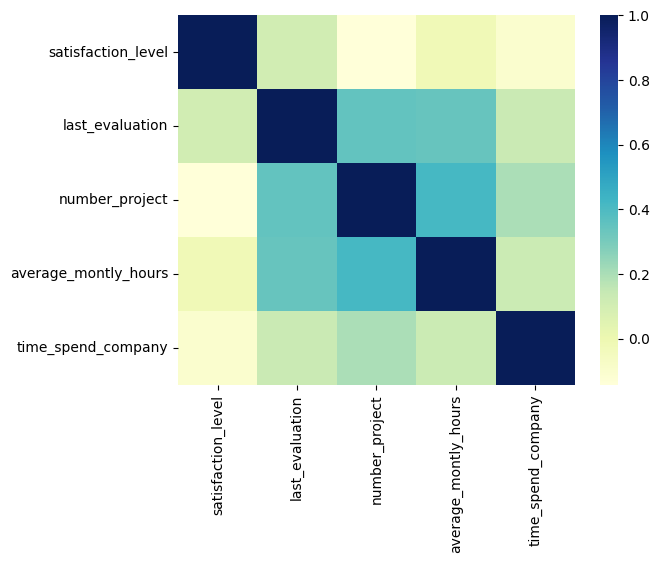

In [ ]:
num_df = df.iloc[:, 0:5]
dataplot = sb.heatmap(num_df.corr(), cmap='YlGnBu')
plt.show()

In [ ]:
# 2 самые скоррелированные переменные
p_coef = df[['number_project', 'average_montly_hours']].corr(method='pearson').iloc[0, 1]
print(p_coef)

0.41721063440177986


In [ ]:
# самые наименее скоррелированные переменные
p_least = df[['satisfaction_level', 'number_project']].corr(method='pearson').iloc[0, 1]
p_least2 = df[['satisfaction_level', 'time_spend_company']].corr(method='pearson').iloc[0, 1]
print(p_least)
print(p_least2)

-0.14296958603690096
-0.10086607257796669


Задание 4

Рассчитайте сколько сотрудников работает в каждом
департаменте

In [ ]:
employees_count = df.groupby('department').count()['left']
employees_count

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: left, dtype: int64

Задание 5

Показать распределение сотрудников по зарплатам

salary
high      1237
low       7316
medium    6446
Name: left, dtype: int64

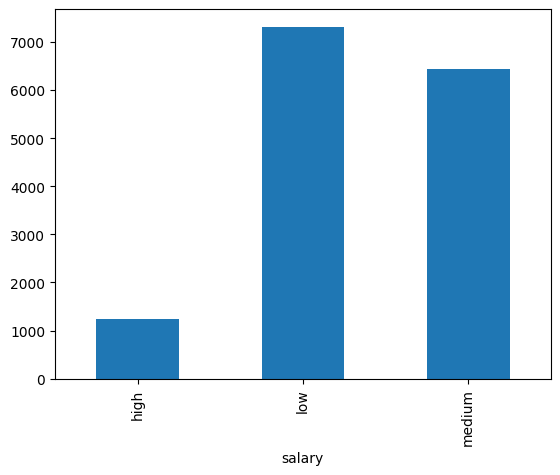

In [ ]:
sal_gr = df.groupby('salary').count()['left']
sal_gr.plot(kind='bar')

Задание 6

Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

<Axes: xlabel='salary,department'>

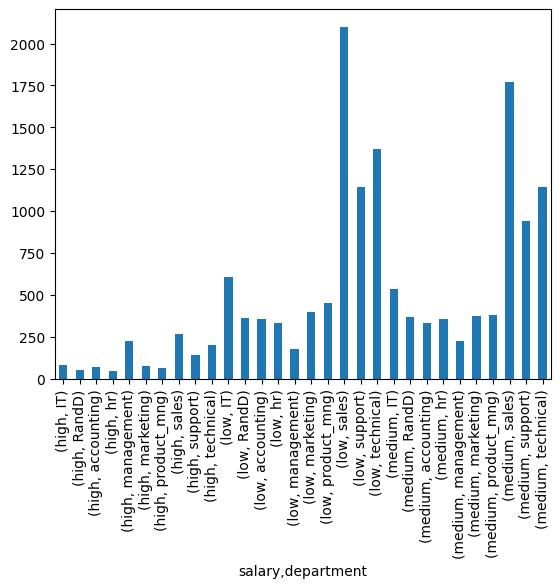

In [ ]:
sal_gr_dep = df.groupby(['salary', 'department']).count()['left']
sal_gr_dep.plot(kind='bar')

<Axes: xlabel='department'>

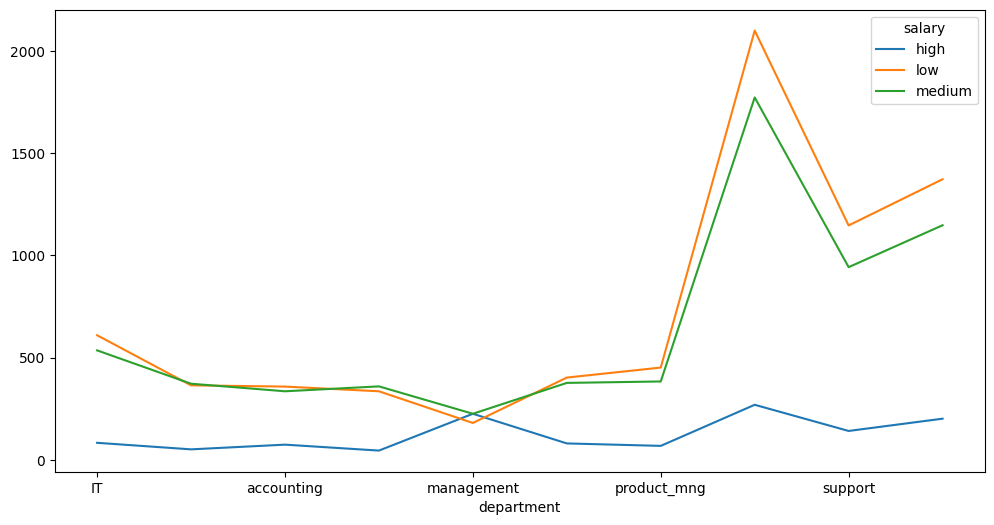

In [ ]:
new_t = df[['salary', 'department', 'left']].pivot_table(index='department', columns='salary', aggfunc='count')
new_t['left'].plot(figsize=(12,6))

Задание 7

Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [ ]:
h_sal = df[df['salary'] == 'high']['average_montly_hours']
l_sal = df[df['salary'] == 'low']['average_montly_hours']
#Данный тест показывает, имеют ли 2 выборки разные средние значения. Нулевая гипотеза закл в равности средних двух выборок (часы работы с высокой и низкой зп)
print(h_sal.var())
print(l_sal.var())

2276.2866157553112
2583.914000624853


In [ ]:
#Тк дисперсии заметно отличаются нужно использовать поправку Уэлча
stat, p = st.ttest_ind(h_sal, l_sal, equal_var=False)
print(f'Статистика = {stat:.5f}, p = {p:.5f}')
if p > 0.05:
  print('Не отклоняем нулевую гипотезу, сотрудники с высоким окладом проводят столько же времени, что и сотрудники с низким окладом')
else:
  print('Отклоняем нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')

Статистика = -0.76243, p = 0.44590
Не отклоняем нулевую гипотезу, сотрудники с высоким окладом проводят столько же времени, что и сотрудники с низким окладом


Задание 8

Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

1.   Доля сотрудников с повышением за последние 5 лет
2.   Средняя степень удовлетворенности
3.   Среднее количество проектов

In [ ]:
def data_calc(data):
  empl_total = sum(data.value_counts())
  empl_prom = sum(data[df['promotion_last_5years'] == 1].value_counts())
  emp_prc = round((empl_prom / empl_total) * 100, 2)
  mn_sat = np.mean(data['satisfaction_level'])
  md_proj = np.median(data['number_project'])
  print(f'Доля сотрудников с повышением за последние 5 лет: {emp_prc}')
  print(f'Средняя степень удовлетворенности: {mn_sat}')
  print(f'Среднее количество проектов: {md_proj}')

In [ ]:
#среди уволившихся сотрудников left == 1
left_df = df[df['left'] == 1]
data_calc(left_df)

Доля сотрудников с повышением за последние 5 лет: 0.53
Средняя степень удовлетворенности: 0.4400980117614114
Среднее количество проектов: 4.0


<ipython-input-186-991dc185690d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  empl_prom = sum(data[df['promotion_last_5years'] == 1].value_counts())


In [ ]:
#среди не уволившихся сотрудников left == 0
not_left_df = df[df['left'] == 0]
data_calc(not_left_df)

Доля сотрудников с повышением за последние 5 лет: 2.63
Средняя степень удовлетворенности: 0.666809590479524
Среднее количество проектов: 4.0


<ipython-input-186-991dc185690d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  empl_prom = sum(data[df['promotion_last_5years'] == 1].value_counts())


Задание 9

Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [ ]:
x = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
len(y_test)

3750

In [ ]:
x_train

In [ ]:
x_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
6723,0.65,0.96,5,226,2,1,0
6473,0.88,0.80,3,166,2,0,0
4679,0.69,0.98,3,214,2,0,0
862,0.41,0.47,2,154,3,0,0
7286,0.87,0.76,5,254,2,1,0
...,...,...,...,...,...,...,...
10371,0.99,0.37,6,219,6,0,0
12541,0.81,0.87,4,254,5,0,0
2656,0.67,0.59,3,177,3,1,0
6759,0.22,0.57,5,174,6,0,0


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [ ]:
#Обучение данных
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
#прогноз на тестовой выборке
pred = lda.predict(x_test)
pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
#разница факта и прогноза
res = pd.DataFrame([y_test, pred]).T
res

,left,Unnamed 0
6723,0.0,NaN
6473,0.0,NaN
4679,0.0,NaN
862,1.0,1.0
7286,0.0,NaN
...,...,...
10371,0.0,NaN
12541,1.0,NaN
2656,0.0,0.0
6759,0.0,NaN


In [ ]:
#Оценка качества модели на тестовой выборке (проверка точности)
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7536